In [1]:
import pandas as pd

train = pd.read_csv('dm2_dataset_2425_imdb/train70_clf.csv')
test = pd.read_csv('dm2_dataset_2425_imdb/test30_clf.csv')

In [2]:
test

,startYear,runtimeMinutes,canHaveEpisodes,numRegions,ratingCount,companiesNumber,averageRating,totalNominations,totalMedia,totalReviews,...,Europe,North America,South America,Australia,Continent Unknown,genre1,genre2,genre3,deltaCredits,titleType
0,1969,77,1,2,43,1,8.4,0,6,1,...,1,0,1,0,0,51745,16437,5785,5,tvMiniSeries
1,2019,10,0,1,68,8,5.6,0,32,0,...,0,1,0,0,0,18931,17855,17763,20,tvEpisode
2,1928,12,0,1,70,0,4.8,1,4,0,...,0,1,0,0,0,16787,16581,0,0,short
3,1988,43,0,1,18,3,7.7,0,55,0,...,0,1,0,0,0,51745,11665,0,28,tvEpisode
4,1995,23,0,1,53,3,7.2,0,1,0,...,0,1,0,0,0,51745,47408,11665,32,tvEpisode
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44855,1995,106,0,2,23,4,6.4,2,2,0,...,1,0,0,0,1,51745,11665,2063,17,movie
44856,1998,23,0,0,30,5,7.8,0,1,0,...,0,0,0,0,0,47408,0,0,38,tvEpisode
44857,1960,60,0,1,287,4,7.5,0,7,15,...,0,1,0,0,0,51745,16437,5785,15,tvEpisode
44858,1957,93,0,1,13,1,5.4,0,8,0,...,1,0,0,0,0,47408,0,0,11,movie


In [3]:
train.head()

,startYear,runtimeMinutes,canHaveEpisodes,numRegions,ratingCount,companiesNumber,averageRating,totalNominations,totalMedia,totalReviews,...,Europe,North America,South America,Australia,Continent Unknown,genre1,genre2,genre3,deltaCredits,titleType
0,1986,87,0,8,342,8,6.4,1,26,15,...,4,2,0,1,0,51745,0,0,65,movie
1,1921,14,0,9,85,5,6.2,0,8,5,...,5,1,0,0,3,47408,16787,0,2,short
2,1995,45,0,0,38,3,7.7,0,3,0,...,0,0,0,0,0,16437,6144,5785,15,tvEpisode
3,2019,80,0,11,2230,16,6.7,3,52,55,...,5,3,2,1,0,51745,11665,0,63,tvMovie
4,2003,40,0,1,20,1,8.0,0,0,1,...,0,1,0,0,0,47408,16787,0,22,short


In [4]:
# Drop observations where titleType is 'videoGame'
train = train[train['titleType'] != 'videoGame']
test = test[test['titleType'] != 'videoGame']

# Define a mapping dictionary for titleType
titletype_mapping = {
    'movie': 'movie',
    'tvMovie': 'movie',
    'short': 'short',
    'tvShort': 'short',
    'tvSeries': 'tvSeries',
    'tvMiniSeries': 'tvSeries',
    'tvEpisode': 'tvEpisode',
    'tvSpecial': 'tvSpecial',
    'video': 'video'
}

# Apply the mapping to the titleType column
train['titleType'] = train['titleType'].map(titletype_mapping)
test['titleType'] = test['titleType'].map(titletype_mapping)

# Check the new unique values
print("New unique values in titleType:", train['titleType'].unique())

New unique values in titleType: ['movie' 'short' 'tvEpisode' 'tvSeries' 'video' 'tvSpecial']


/var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/ipykernel_17231/1964269640.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['titleType'] = test['titleType'].map(titletype_mapping)


In [5]:
from sklearn.preprocessing import LabelEncoder

X_train = train.drop(columns=['titleType', 'canHaveEpisodes'])
y_train = train['titleType']

X_test = test.drop(columns=['titleType', 'canHaveEpisodes'])
y_test = test['titleType']

In [8]:
# One-hot encode y_train for categorical_crossentropy
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# model.summary()

In [16]:
history = model.fit(
    X_train, y_train,
    epochs=200, batch_size=64, validation_split=0.2
)

Epoch 1/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7256 - loss: 7.5917 - val_accuracy: 0.7076 - val_loss: 6.6765
Epoch 2/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7164 - loss: 7.5061 - val_accuracy: 0.5599 - val_loss: 10.5213
Epoch 3/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7233 - loss: 6.6719 - val_accuracy: 0.7587 - val_loss: 4.4598
Epoch 4/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7284 - loss: 6.2232 - val_accuracy: 0.7235 - val_loss: 6.9445
Epoch 5/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7287 - loss: 5.8431 - val_accuracy: 0.6980 - val_loss: 4.9579
Epoch 6/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7288 - loss: 5.3963 - val_accuracy: 0.7840 - val_loss: 3.6875
Epoch 7/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7238 - loss: 5.4886 - val_accuracy: 0.7566 - val_loss: 5.5721
Epoch 8/200
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7417 - loss: 4.4302 - val_acc

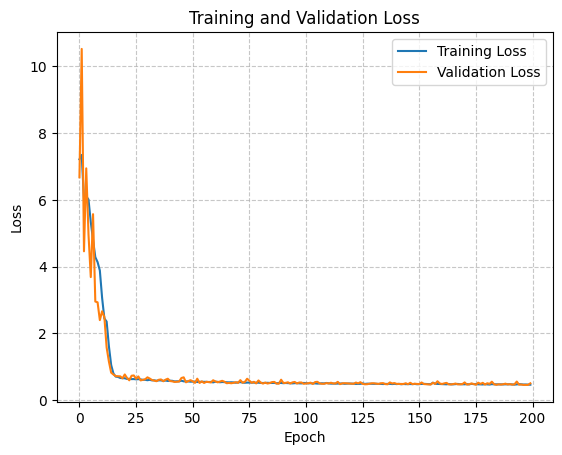

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()

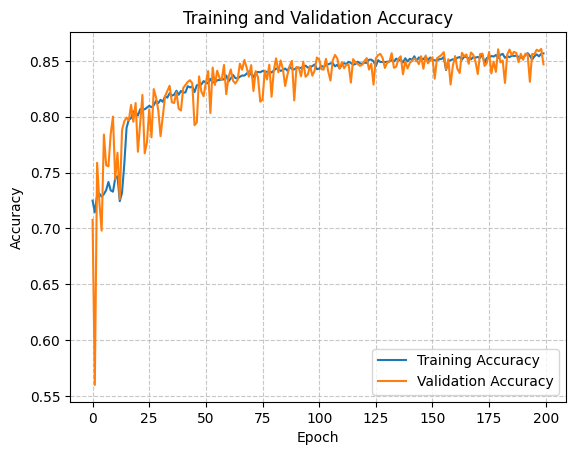

1386/1386 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step


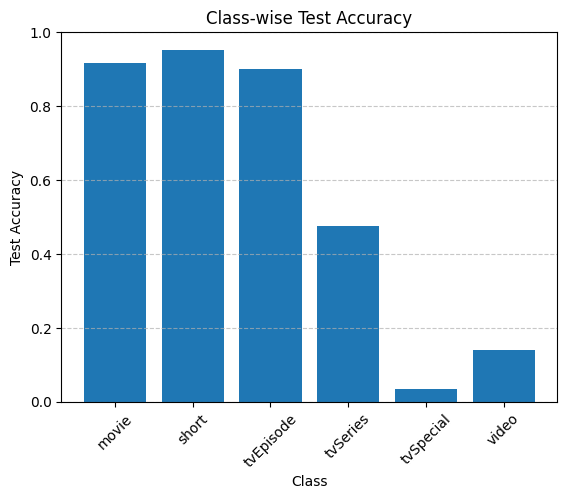

In [18]:
from sklearn.metrics import accuracy_score

# Plot overall accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()

# Class-wise accuracy on test set

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Calculate accuracy for each class
class_accuracies = {}
for i, class_name in enumerate(le.classes_):
    idx = (y_test == i)
    class_acc = accuracy_score(y_test[idx], y_pred_classes[idx])
    class_accuracies[class_name] = class_acc

# Plot class-wise accuracy
plt.bar(class_accuracies.keys(), class_accuracies.values())
plt.xlabel('Class')
plt.ylabel('Test Accuracy')
plt.title('Class-wise Test Accuracy')
plt.xticks(rotation=45)
plt.grid(alpha=0.7, linestyle='--', axis='y')
plt.show()

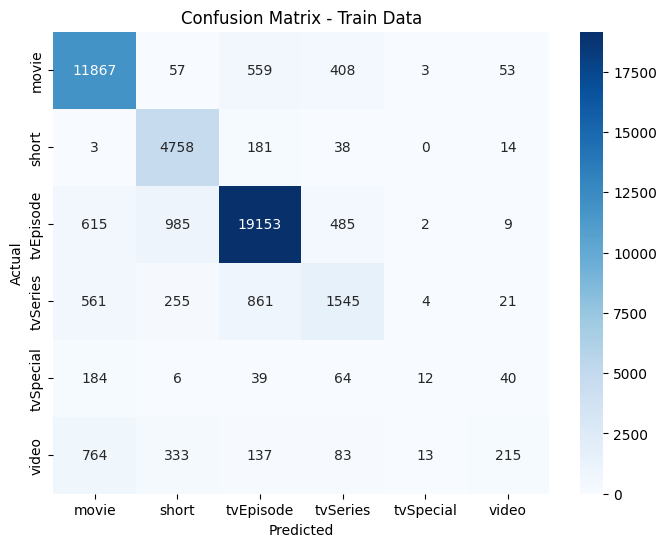

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm_train = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train Data')
plt.show()

In [24]:
from sklearn.metrics import classification_report

# Macro scores
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

              precision    recall  f1-score   support

       movie       0.85      0.92      0.88     12947
       short       0.74      0.95      0.84      4994
   tvEpisode       0.92      0.90      0.91     21249
    tvSeries       0.59      0.48      0.53      3247
   tvSpecial       0.35      0.03      0.06       345
       video       0.61      0.14      0.23      1545

    accuracy                           0.85     44327
   macro avg       0.68      0.57      0.57     44327
weighted avg       0.84      0.85      0.83     44327

